# Car Price Prediction Project

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make carprice valuation model.

In [1]:
# importing required library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\akhan\\Downloads\\used car data.csv") #importing the collected data

In [3]:
df

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,N0OF_OWNERS,PRICE
0,New Delhi,2018,Ford,Ecosport 1.5TITANIUM TDCI,Manual,"21,169 km",Diesel,1st Owner,"? 8,88,999"
1,New Delhi,2019,Hyundai,VENUE 1.0 TURBO GDI SX+ AT,Automatic,"7,676 km",Petrol,1st Owner,"? 9,95,499"
2,New Delhi,2018,Maruti,Vitara Brezza VDI,Manual,"40,458 km",Diesel,1st Owner,"? 7,79,299"
3,New Delhi,2018,Maruti,Vitara Brezza VDI,Manual,"82,601 km",Diesel,1st Owner,"? 6,36,299"
4,New Delhi,2018,Hyundai,Creta 1.6 E + VTVT,Manual,"39,294 km",Petrol,2nd Owner,"? 8,98,799"
...,...,...,...,...,...,...,...,...,...
1216,Ahmedabad,2019,Maruti,Ertiga ZXI SMART HYBRID,Manual,"8,424 km",Petrol,1st Owner,"? 9,44,399"
1217,Ahmedabad,2016,Hyundai,Creta 1.6 S PLUS AT CRDI,Manual,"94,709 km",Diesel,1st Owner,"? 7,76,099"
1218,Ahmedabad,2013,Toyota,Innova 2.5 VX 8 STR BS IV,Manual,"2,80,921 km",Diesel,2nd Owner,"? 7,05,599"
1219,Ahmedabad,2020,Hyundai,VENUE S MT 1.2 KAPPA,Manual,"4,689 km",Petrol,1st Owner,"? 7,75,399"


# EDA.

In [4]:
df.columns

Index(['LOCATION', 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM',
       'FUELTYPE', 'N0OF_OWNERS', 'PRICE'],
      dtype='object')

In [5]:
df.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [6]:
df.MNF_YEAR.unique()

array([2018, 2019, 2017, 2016, 2015, 2014, 2020, 2013, 2012, 2011, 2010,
       2021, 2009], dtype=int64)

In [7]:
df.BRAND.unique()

array(['Ford', 'Hyundai', 'Maruti', 'Toyota', 'Mahindra', 'Volkswagen',
       'Skoda', 'Honda', 'BMW', 'Mercedes', 'Ssangyong', 'Audi', 'Tata',
       'Renault', 'Datsun', 'Nissan', 'Jeep'], dtype=object)

In [8]:
df.VARIANT.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [11]:
df.N0OF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

In [12]:
df.duplicated().sum()

338

In [13]:
df.isnull().sum()

LOCATION        0
MNF_YEAR        0
BRAND           0
MODEL           0
VARIANT        11
DRIVEN_KM       0
FUELTYPE        0
N0OF_OWNERS     0
PRICE           0
dtype: int64

# Cleaning the Data.

Removing the Duplicate Records.

In [14]:
df = df.drop_duplicates() #Because we have too many duplicate records we will detete them to have a good model

In [15]:
df.isnull().sum() 

LOCATION        0
MNF_YEAR        0
BRAND           0
MODEL           0
VARIANT        10
DRIVEN_KM       0
FUELTYPE        0
N0OF_OWNERS     0
PRICE           0
dtype: int64

From above we can see that the only in VARIANT we have values missing so we will change VARIANT nan values as NOT MENTIONED

# Mathematical/ Analytical Modeling of the Data

In [16]:
df['VARIANT'] = df['VARIANT'].fillna('NOT MENTIONED')

In [17]:
DF = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['LOCATION' , 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'N0OF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [20]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['DRIVEN_KM'] = DF['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

In [21]:
DF.describe()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,N0OF_OWNERS,PRICE
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,8.830000e+02
mean,5.440544,8.643262,12.578709,139.913930,0.857305,43526.952435,0.703284,0.219706,6.267737e+05
std,2.939995,3.433632,3.130437,78.685065,0.380983,33833.245517,0.485925,0.453479,2.953709e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,470.000000,0.000000,0.000000,1.632990e+05
25%,3.000000,7.000000,11.000000,72.000000,1.000000,18909.500000,0.000000,0.000000,4.264990e+05
50%,6.000000,10.000000,14.000000,145.000000,1.000000,34119.000000,1.000000,0.000000,5.699990e+05
75%,8.000000,11.000000,15.000000,203.000000,1.000000,62205.000000,1.000000,0.000000,7.309490e+05
max,9.000000,12.000000,16.000000,279.000000,2.000000,280921.000000,2.000000,2.000000,2.322099e+06


In [22]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 1184
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LOCATION     883 non-null    int32
 1   MNF_YEAR     883 non-null    int32
 2   BRAND        883 non-null    int32
 3   MODEL        883 non-null    int32
 4   VARIANT      883 non-null    int32
 5   DRIVEN_KM    883 non-null    int32
 6   FUELTYPE     883 non-null    int32
 7   N0OF_OWNERS  883 non-null    int32
 8   PRICE        883 non-null    int32
dtypes: int32(9)
memory usage: 37.9 KB


Correlation of the Data

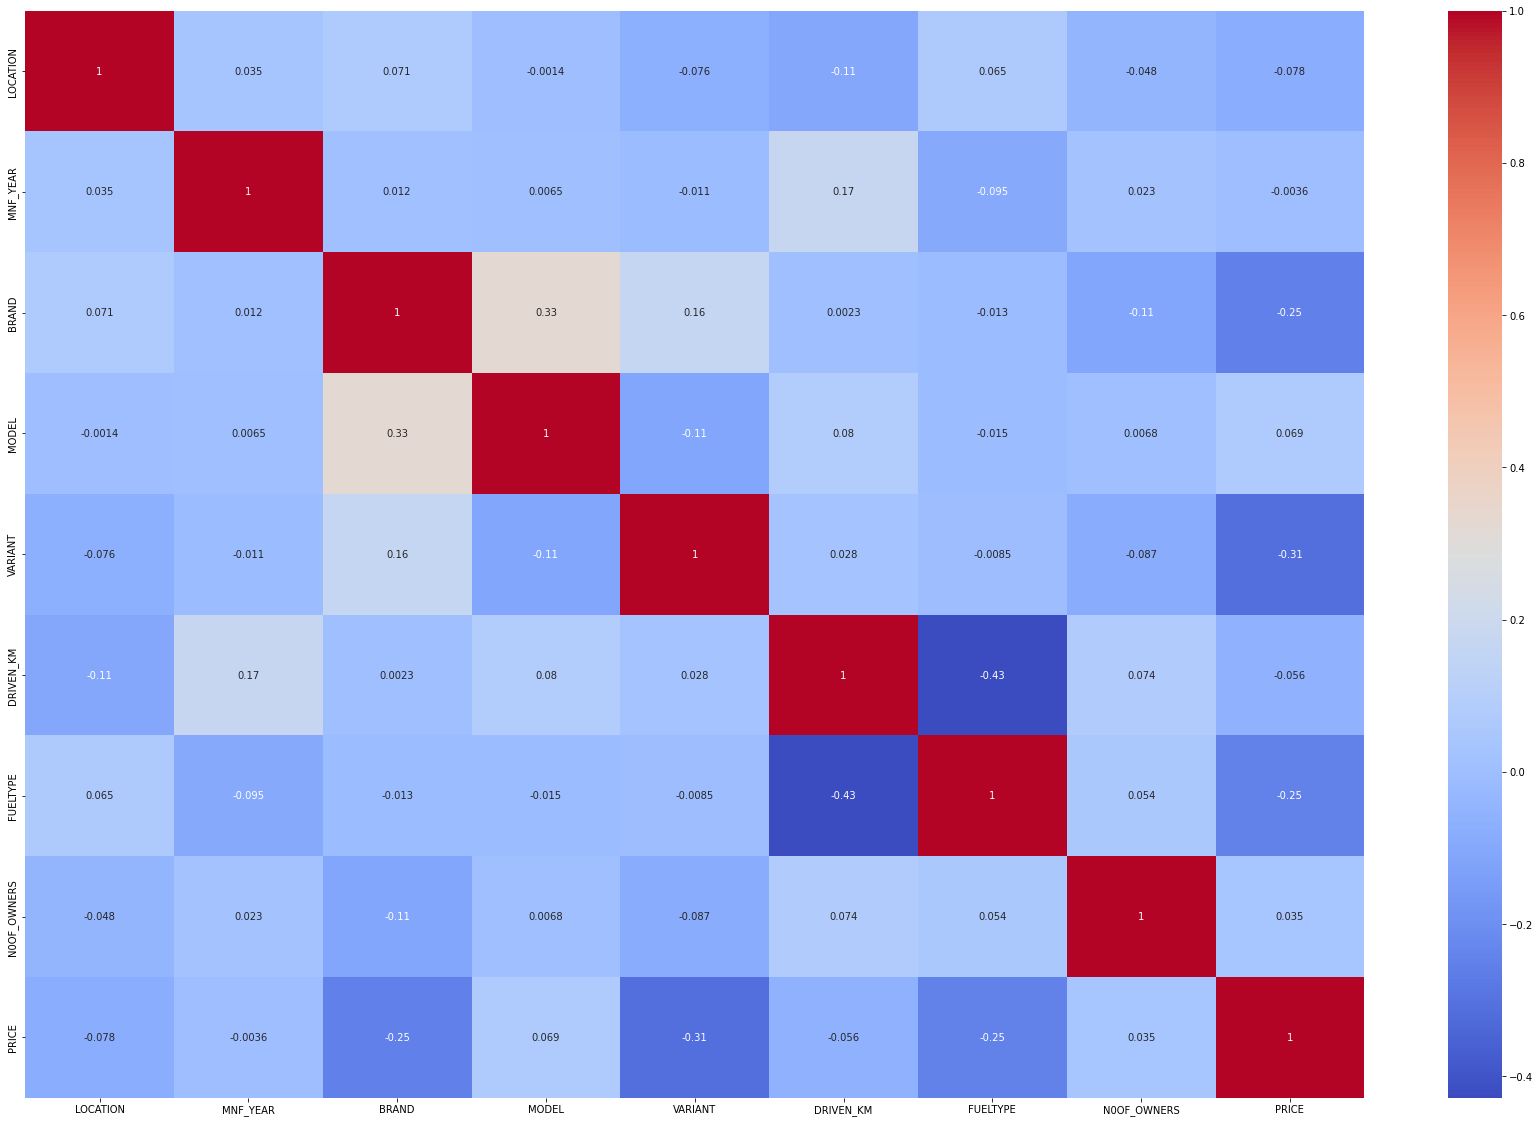

In [23]:
plt.figure(figsize=(30,20))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

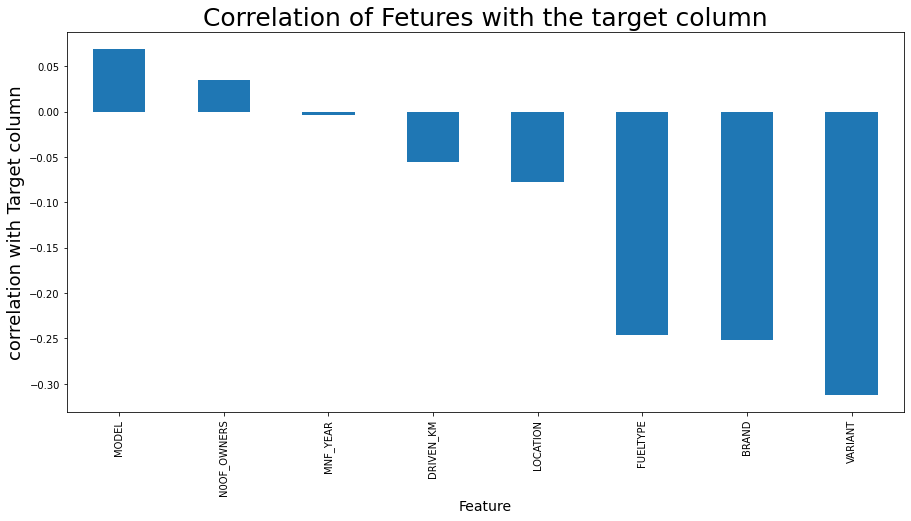

KEY OBSERVATIONS:
 


,PRICE
MODEL,0.069038
N0OF_OWNERS,0.035179
MNF_YEAR,-0.003618
DRIVEN_KM,-0.055501
LOCATION,-0.077938
FUELTYPE,-0.245683
BRAND,-0.252050
VARIANT,-0.312011


In [24]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

# Key Observations:

From above we can clearly see that MNF_YEAR is postivly correlated to PRICE and FUEL_TYPE and VARIENT is negative corelated to PRICE

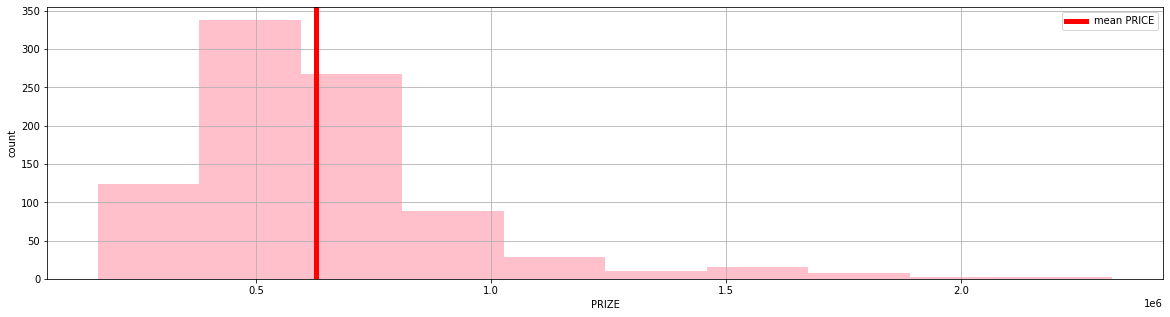

MATHEMATICAL SUMMARY OF PRIZE :
 count    8.830000e+02
mean     6.267737e+05
std      2.953709e+05
min      1.632990e+05
25%      4.264990e+05
50%      5.699990e+05
75%      7.309490e+05
max      2.322099e+06
Name: PRICE, dtype: float64


In [25]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.PRICE.describe())

Key Observations:

Mean of the prize is Rs: 5,33,047, the prize is distributed between Rs: 99,162 to Rs: 41,00,000.

            
Above we can understand that most of the Car price is leser than the Mean i.e Rs: 5,33,047.

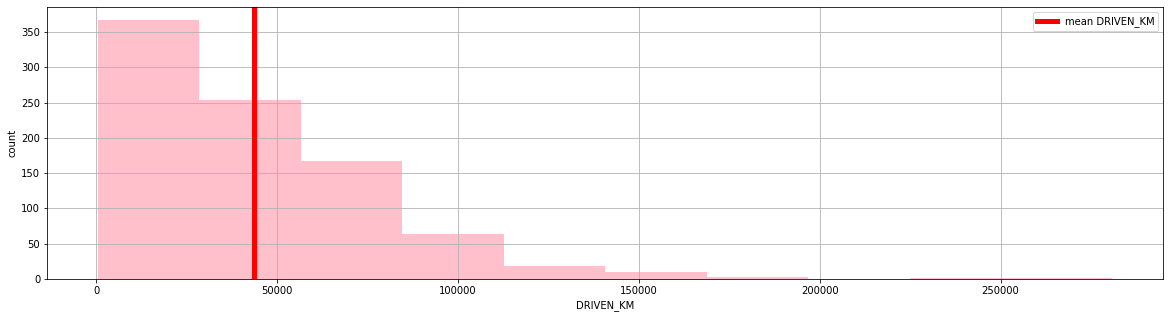

MATHEMATICAL SUMMARY OF PRIZE :
 count       883.000000
mean      43526.952435
std       33833.245517
min         470.000000
25%       18909.500000
50%       34119.000000
75%       62205.000000
max      280921.000000
Name: DRIVEN_KM, dtype: float64


In [26]:
DF.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.DRIVEN_KM.describe())

Key observations:

Mean of the DRIVEN_KM is 64489.278888kms and the maximum KMS driven is 312882kms.


Above we can understand that most of the Car comes to sellimg arround low kilometers driven.

# Multivariate Analysis:

In [29]:
DF1 = df.copy()

In [30]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['DRIVEN_KM'] = DF1['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

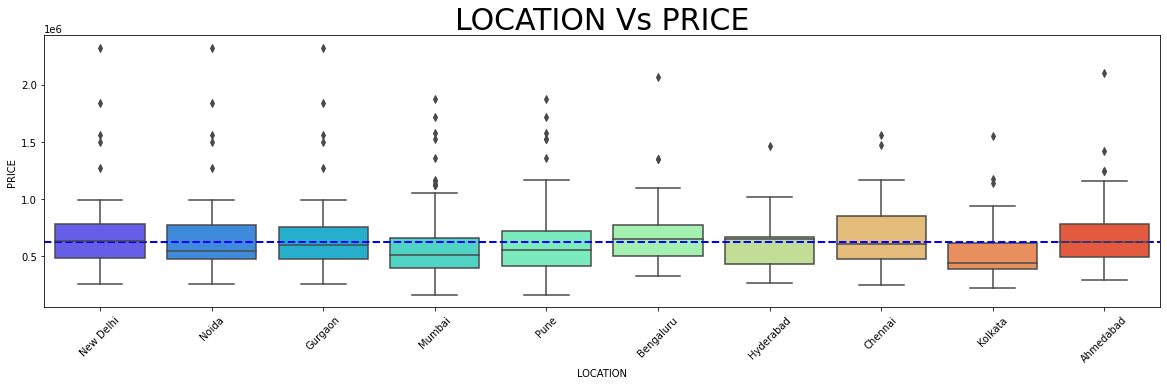

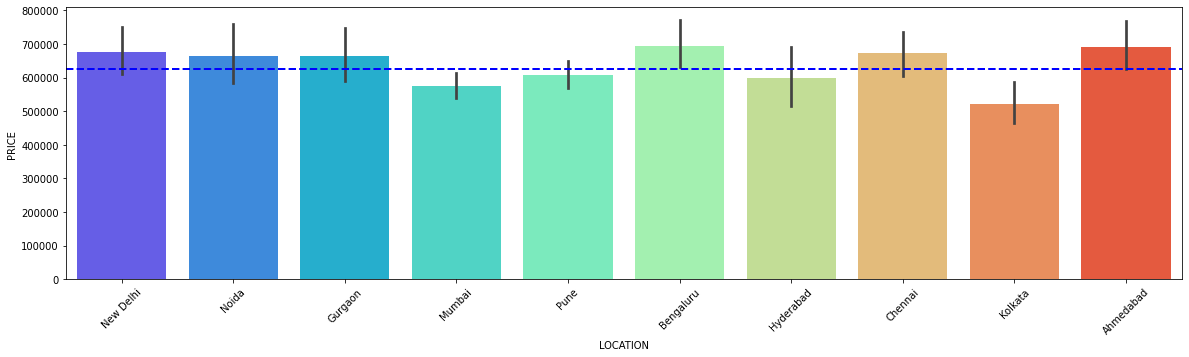

In [31]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observations:

New Delhi, Noida, Gurgaon have the costiliest cars and Mumbai, Pune, Ahmedabad have most cars being sold.

We have Bengaluru, Hyderabad, Chennai, Kolkata have least cars being sold and also comprativly cheaper.

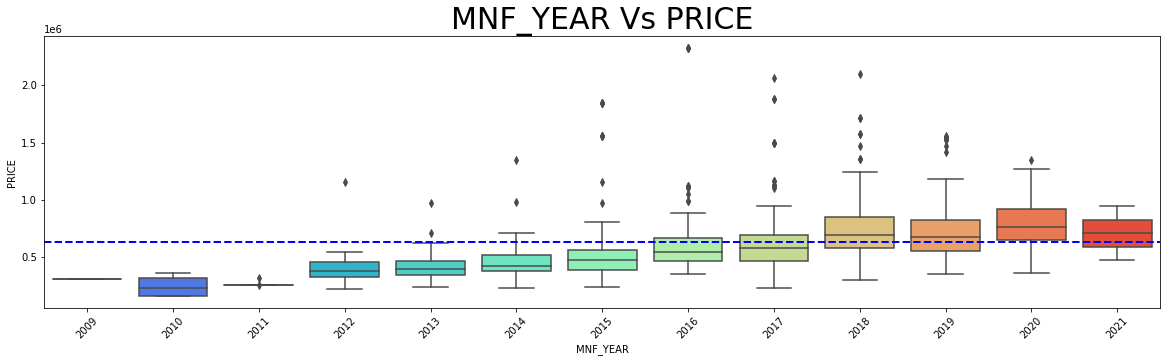

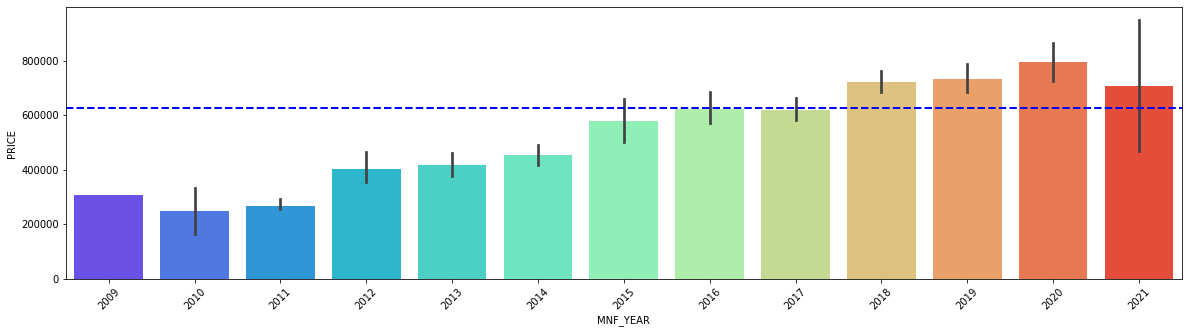

In [33]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()


Key observations:

2019, 2020, 2021 model are being sold higher in PRICE and also above average PRICE.

Above we can understand thatcars sold in lesser kms driven and also in lesser years used are sold in high price.

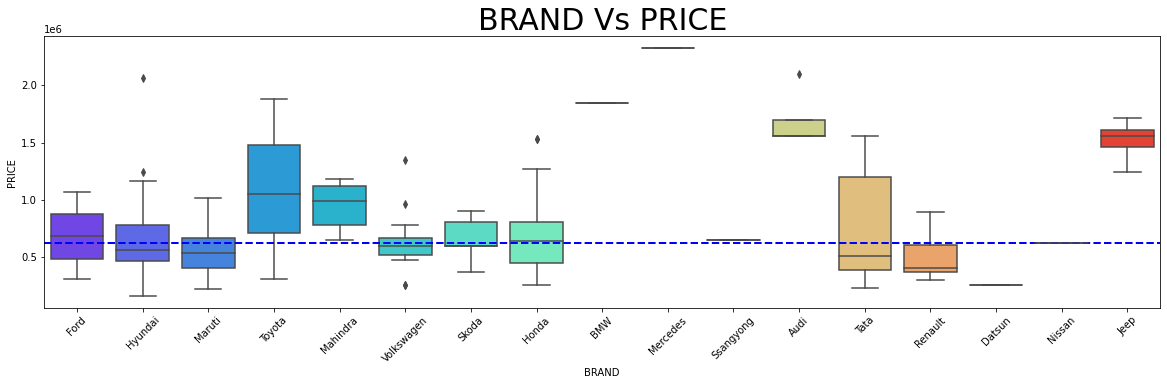

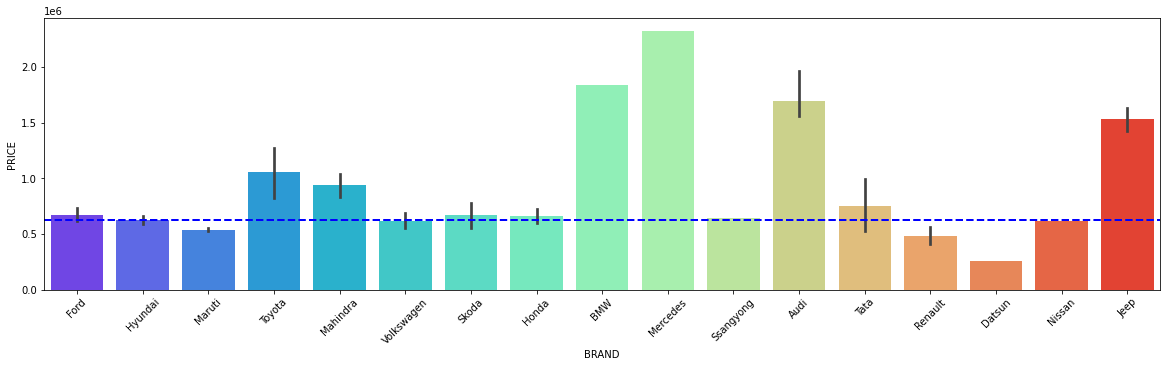

In [34]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observations:

When comes to the Brand Land rover are being the costliest in country followed by Jaguar

And most of the other brands including most of the foreign brands are below the PRICE mean line

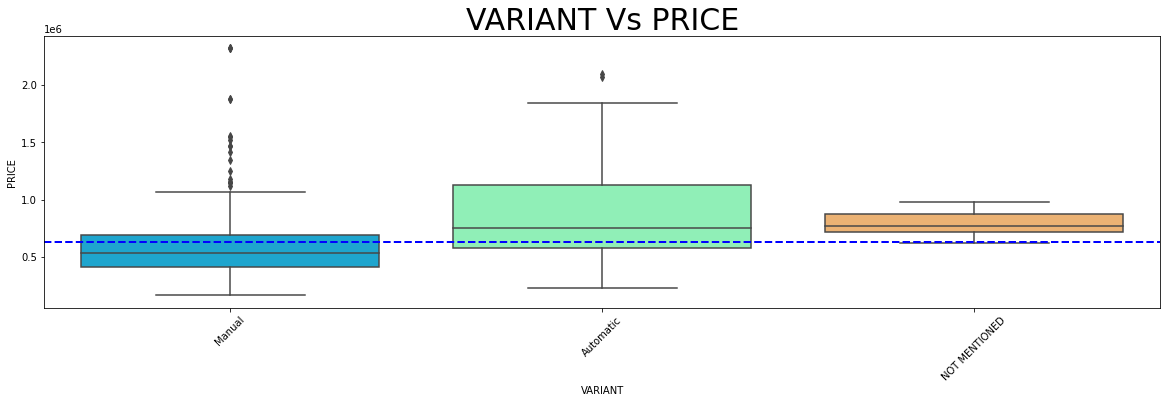

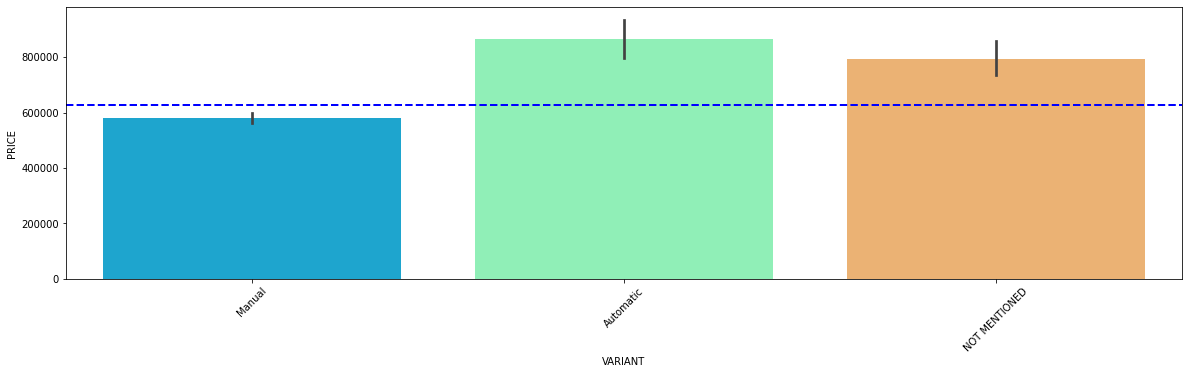

In [35]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observations:

We can see that the automatic engines are costliest in the market. And also most costilier cars comes in Automatic Drift.

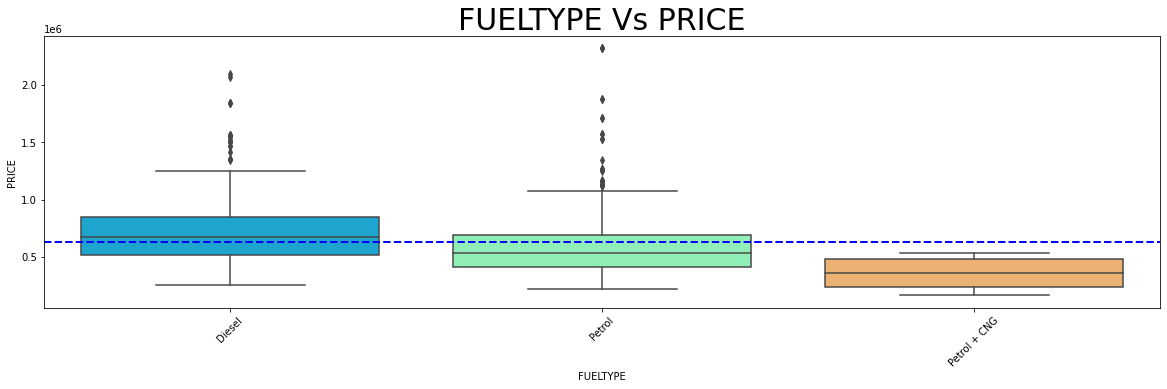

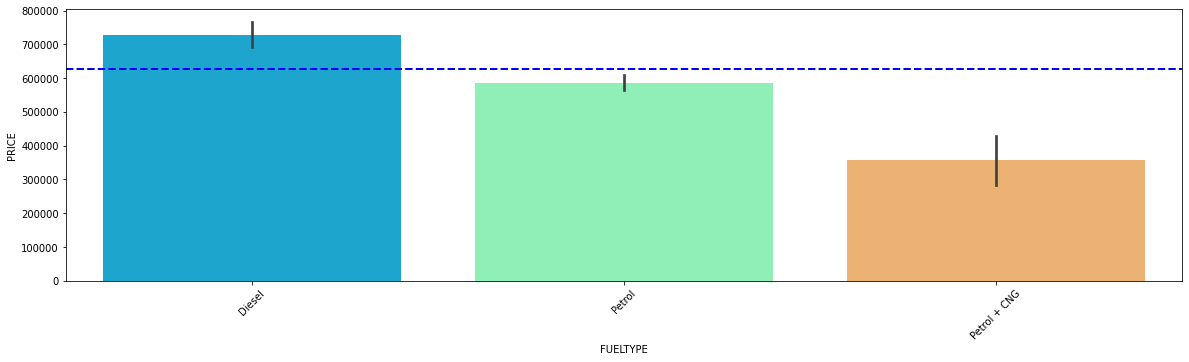

In [36]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observations:

Diesel being the chepeast and most efficient fuel type, and so the Desiel engines are being the costiliest fuel types.

Petrol bend second prefered followed by CNG and LPG fuel types.

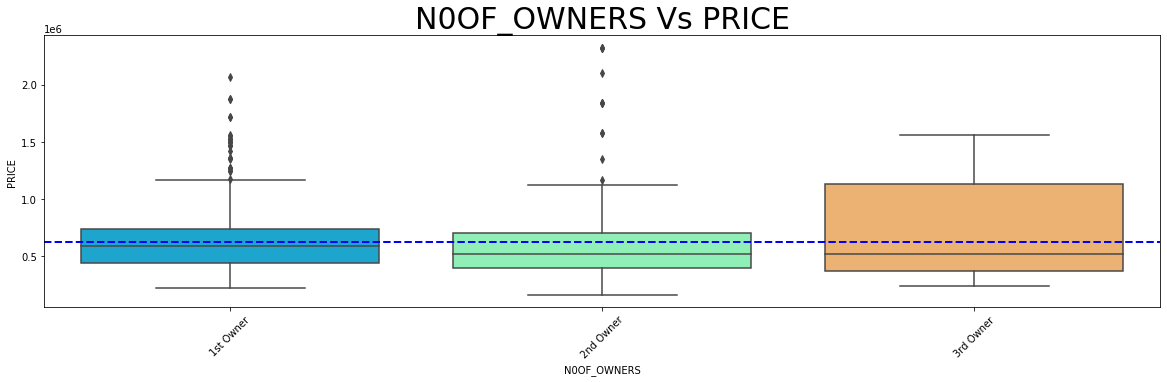

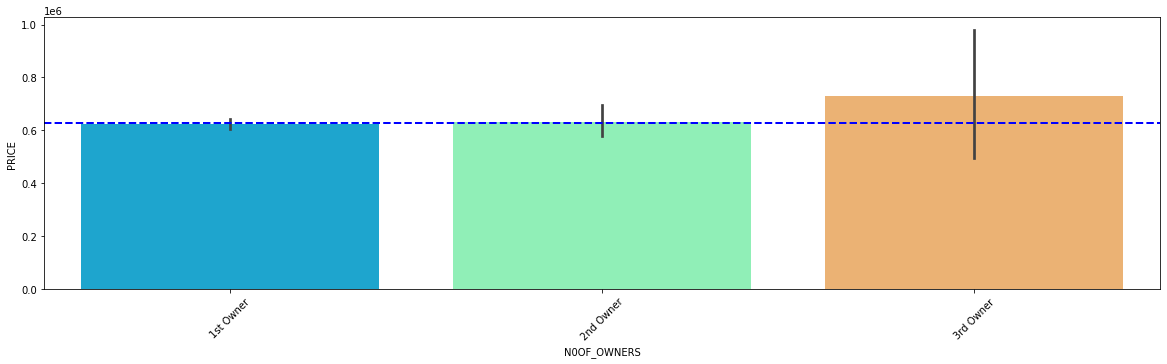

In [37]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "N0OF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("N0OF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "N0OF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observation:

1st owner cars are costilest followed by second and third.

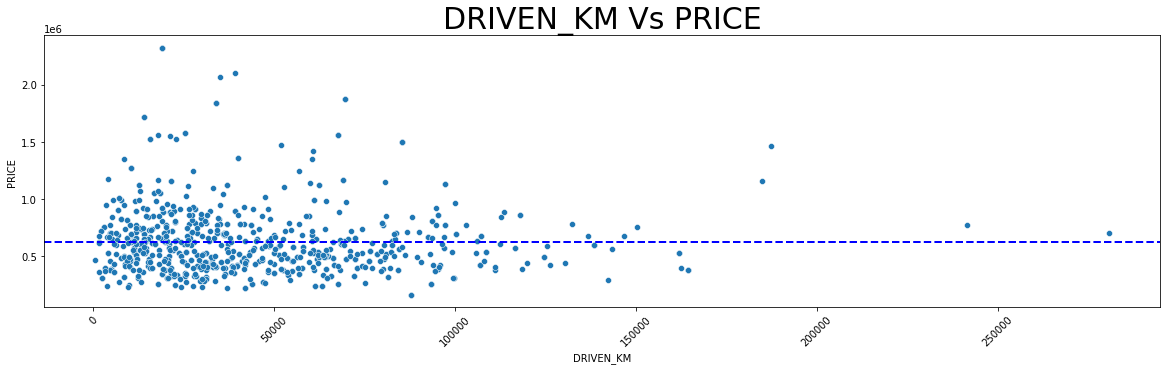

In [38]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

Key Observations:

The lesser kms driven are evidently sold costilier.

# Data Pre-Processing.

Lets observe the skewness and outliers in the Data.

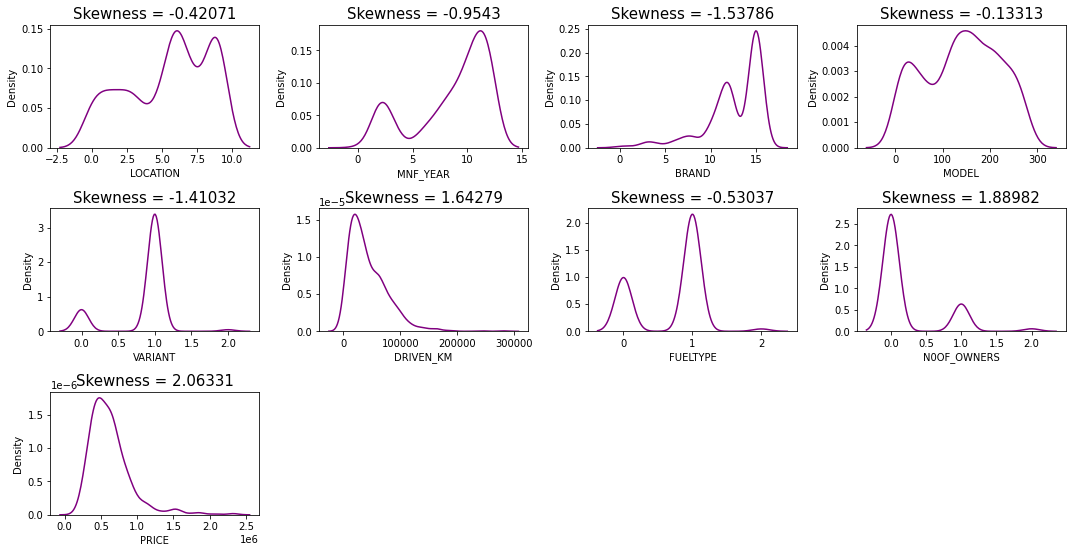

In [39]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "purple")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

Lets also see the Outliers mathematically.

In [40]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [41]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")

Orginal Data (883, 9)
After Removing outliers (810, 9)
The percentage of data loss 6.535869041887338%


We have many outliers and we also have skewness in the data. Because its more, correcting them will have loss in the data orr data will be deformed. So we are deciding to work with the same.

In [42]:
x_1=DF.drop(["PRICE"], axis = 1)
y_1=DF.PRICE

In [43]:
x_1

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,N0OF_OWNERS
0,7,12,10,10,1,21169,0,0
1,7,2,12,144,0,7676,1,0
2,7,12,15,159,1,40458,0,0
3,7,12,15,159,1,82601,0,0
4,7,12,12,256,1,39294,1,1
...,...,...,...,...,...,...,...,...
1180,0,3,15,2,1,11061,1,0
1181,0,12,0,1,0,39254,0,1
1182,0,12,13,248,1,57010,0,0
1183,0,6,7,44,1,184782,0,2


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

# Model Building

Selecting parameters for training

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 39.246767997790045 found on randomstate 821


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Shortlisting the best model

In [48]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [49]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.20225279799352702

ERROR:
MEAN ABSOLUTE ERROR:  170755.73797036268
MEAN SQUARED ERROR:  52447082648.11443
ROOT MEAN SQUARED ERROR : 229013.2805059882
R2 SCORE:  0.39246767997790044
**********************************************************************************************************



Score of Lasso() is: 0.2022527978746057

ERROR:
MEAN ABSOLUTE ERROR:  170755.47234424943
MEAN SQUARED ERROR:  52447203953.16892
ROOT MEAN SQUARED ERROR : 229013.54534867348
R2 SCORE:  0.392466274814115
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.20225184942115826

ERROR:
MEAN ABSOLUTE ERROR:  170748.18135983218
MEAN SQUARED ERROR:  52466617080.11533
ROOT MEAN SQUARED ERROR : 229055.9256603403
R2 SCORE:  0.3922413985873139
**********************************************************************************************************



Score of ElasticNet() is: 

In [51]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.22318531 0.1478367  0.22728407 0.19330044 0.25122725]
MEAN OF SCORE is : 0.208566754567439
Standard Deviation : 0.03551100602395378
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.22318492 0.14783756 0.22728526 0.19330265 0.25122944]
MEAN OF SCORE is : 0.20856796815280135
Standard Deviation : 0.03551114226734558
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.22312542 0.14795314 0.22734656 0.19340637 0.25130394]
MEAN OF SCORE is : 0.208627087504569
Standard Deviation : 0.03548219753757435
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.17436181 0.13747402 0.19997066 0.17801975 0.21867745]
MEAN OF SCORE 

In [52]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.971358,0.757220,0.158918,70153.885656,1.249938e+10,111800.621905,0.855211
6,DecisionTreeRegressor,1.000000,0.553871,0.515587,65573.746606,2.272481e+10,150747.514622,0.736762
7,AdaBoostRegressor,0.569433,0.465107,0.160450,161464.339772,4.019467e+10,200486.094222,0.534396
5,KNeighborsRegressor,0.553192,0.308742,0.052470,148601.445249,4.527507e+10,212779.395081,0.475546
2,Ridge,0.202252,0.208627,0.035482,170748.181360,5.246662e+10,229055.925660,0.392241
1,Lasso,0.202253,0.208568,0.035511,170755.472344,5.244720e+10,229013.545349,0.392466
0,LinearRegression,0.202253,0.208567,0.035511,170755.737970,5.244708e+10,229013.280506,0.392468
3,ElasticNet,0.169594,0.181701,0.027293,175776.224870,6.002621e+10,245002.465203,0.304673
4,SVR,-0.029792,-0.062451,0.067143,200556.241488,9.143751e+10,302386.366694,-0.059187


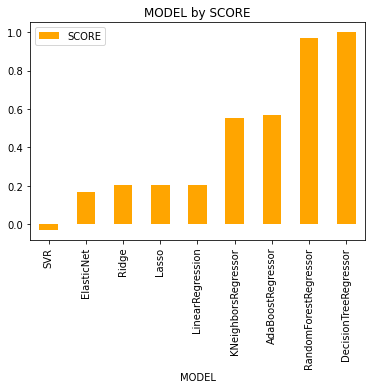

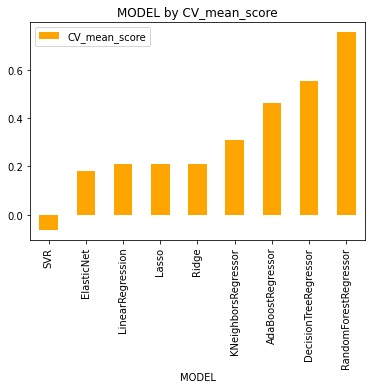

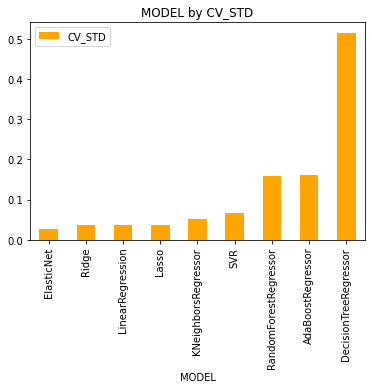

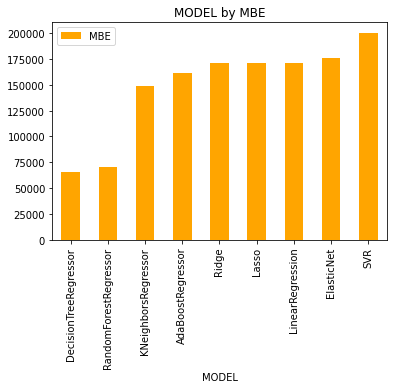

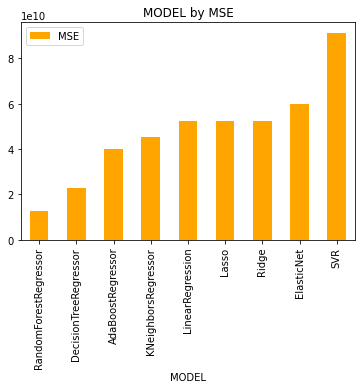

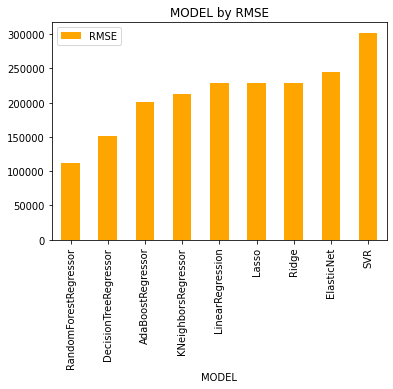

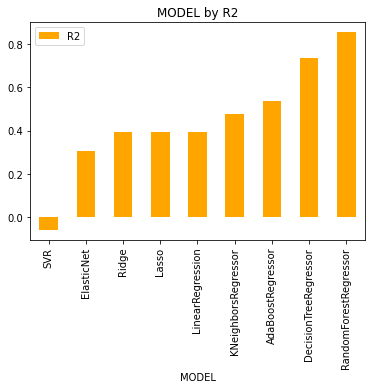

In [53]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above observation, we can come to a conclusion that Randomforest is the best model with Score of 98.78 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [54]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

621296.8333383686

In [55]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
predm=rf.predict(x_test)

In [57]:
predm

array([ 729578.  ,  587750.28,  581414.  ,  606580.  ,  398531.  ,
        354270.  ,  428099.  ,  487373.  ,  478552.  , 1375461.  ,
       1238871.  ,  846254.  ,  518323.  ,  654311.  ,  614426.  ,
       1025566.  ,  672641.  , 1143395.  ,  535987.02,  920896.  ,
        718439.  ,  681979.  ,  441658.  ,  807194.  ,  429196.  ,
       1196499.  ,  501684.  , 1191875.  ,  418908.  ,  549812.  ,
        543950.  ,  666534.  ,  469874.  ,  562264.  ,  668877.  ,
        668267.  , 1132819.  ,  744184.  ,  850593.  ,  673404.  ,
        873923.  ,  479793.  ,  692604.  ,  520959.01,  730440.  ,
        504505.  , 1369660.  ,  835313.  ,  498330.  ,  704136.  ,
        700254.  ,  768415.  , 1279220.  ,  581229.  ,  786233.  ,
        704578.  ,  683831.  ,  714463.  ,  472723.  ,  539776.05,
        595856.  ,  767629.  ,  483452.  ,  462762.  ,  559336.  ,
        568698.  ,  718849.  ,  484464.  ,  305568.  ,  757070.  ,
        451959.  ,  899392.  ,  464960.  ,  877255.  ,  579667

In [58]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.8552106928596102, 0.9713584838084283)

In [59]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Model Evaluation

Hyper Parameter Tuning.

In [60]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [61]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [62]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='log2',
                      random_state=42)

In [63]:
reg_final_model = grid_search.best_estimator_

In [64]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='log2',
                      random_state=42)

In [65]:
grid_search.best_score_

0.8150486198100383

In [66]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.9674054463562055, 0.9731230985112707)

# Saving the final model

In [67]:
import joblib
joblib.dump(reg_final_model,"CARPRICE_Prediction.obj")

['CARPRICE_Prediction.obj']